<a href="https://colab.research.google.com/github/Sourav-Manik/AI-Assignments/blob/main/Assignment_3_Data_Preprocessing_(Image_Preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
from keras.utils import *
import keras

In [ ]:
DATA_FOLDER = "/content/drive/MyDrive/AI/ImagesFromTheWild"

#C:/Users/soura/OneDrive/Desktop/AI/Datasets/ImagesFromTheWild
# TRAin_DATA_FOLDER = os.path.join(BASE_DATA_FOLDER,)
# TRAin_DATA_FOLDER = os.path.join(BASE_DATA_FOLDER,'train')

In [ ]:
images_per_class = {}
for class_folder_name in os.listdir(DATA_FOLDER):
    print(class_folder_name)
    class_folder_path = os.path.join(DATA_FOLDER, class_folder_name)
    # class_folder_path = TRAin_DATA_FOLDER
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.tiff")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        images_per_class[class_label].append(image_bgr)

Common Chickweed
Small-flowered Cranesbill
Cleavers
Charlock
Fat Hen
Shepherds Purse
Scentless Mayweed
Common wheat


In [ ]:
class_label

'Common wheat'

In [ ]:
for key,value in images_per_class.items():
    print("{0} -> {1}".format(key, len(value)))

Common Chickweed -> 12
Small-flowered Cranesbill -> 12
Cleavers -> 12
Charlock -> 12
Fat Hen -> 12
Shepherds Purse -> 12
Scentless Mayweed -> 12
Common wheat -> 12


In [ ]:
def plot_for_class(label):
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images_per_class[label][n])
            n += 1   

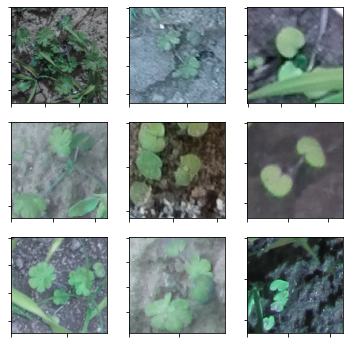

In [ ]:
plot_for_class("Small-flowered Cranesbill")

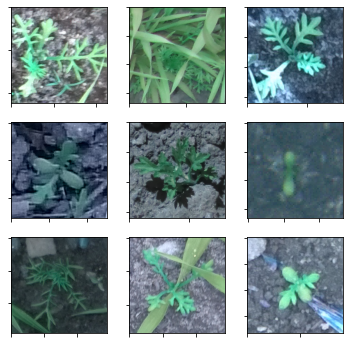

In [ ]:
plot_for_class("Scentless Mayweed")

#Method A

In [ ]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

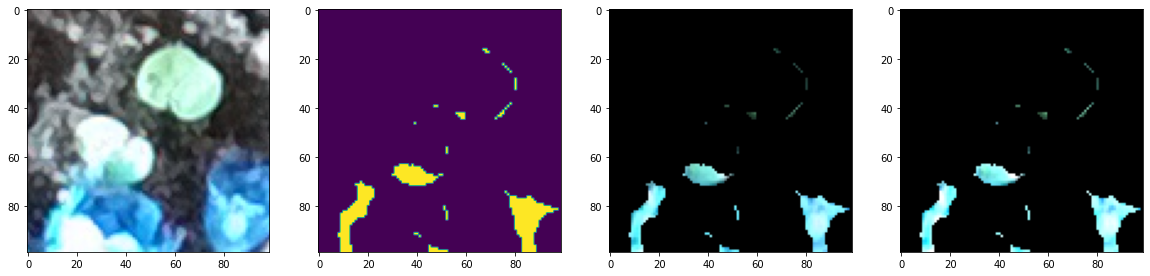

In [ ]:
# Test image to see the changes
image = images_per_class["Small-flowered Cranesbill"][9]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

#Method B

In [ ]:
from tqdm.notebook import tqdm_notebook as tqdm

In [ ]:
def preprop_img(image_path, verbose=0):
    if verbose:
        print(image_path)
    img=cv2.imread(image_path)
    img=cv2.resize(img, (128,128))
    return img

In [ ]:
# EDA, Visualization and Data preparation
#Reading the image file and converting them to array
train_image=[]
train_label=[]
BASE=DATA_FOLDER
for i in tqdm(os.listdir(BASE), total=len(images_per_class)):
    for j in os.listdir(os.path.join(BASE,i)):
        train_image.append(preprop_img(os.path.join(BASE,i,j)))
        train_label.append(images_per_class[i])
train_image=np.array(train_image)
train_label=np.array(train_label)

print("Shape of train_image:",train_image.shape,"Shape of train_label:",train_label.shape)


  0%|          | 0/8 [00:00<?, ?it/s]

Shape of train_image: (96, 128, 128, 3) Shape of train_label: (96, 12)


<ipython-input-13-8585915147bf>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_label=np.array(train_label)


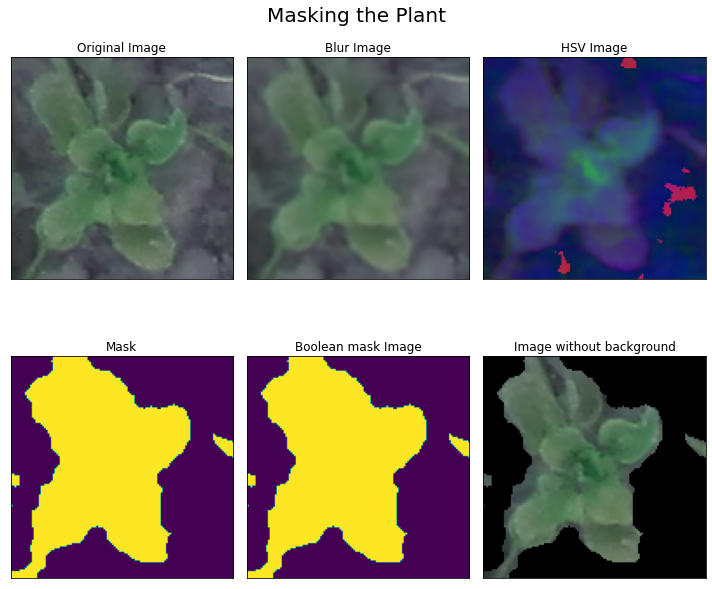

In [ ]:
clearTrainImg = []
examples = []; getEx = True
plt.figure(figsize=(10,9))

for img in train_image:
    
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.xticks([]), plt.yticks([]), plt.title("Original Image")
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.xticks([]), plt.yticks([]), plt.title("Blur Image")
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.xticks([]), plt.yticks([]), plt.title("HSV Image")
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.xticks([]), plt.yticks([]), plt.title("Mask")
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.xticks([]), plt.yticks([]), plt.title("Boolean mask Image")
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        plt.xticks([]), plt.yticks([]), plt.title("Image without background")
        getEx = False

plt.suptitle("Masking the Plant", fontsize=20)
plt.tight_layout()

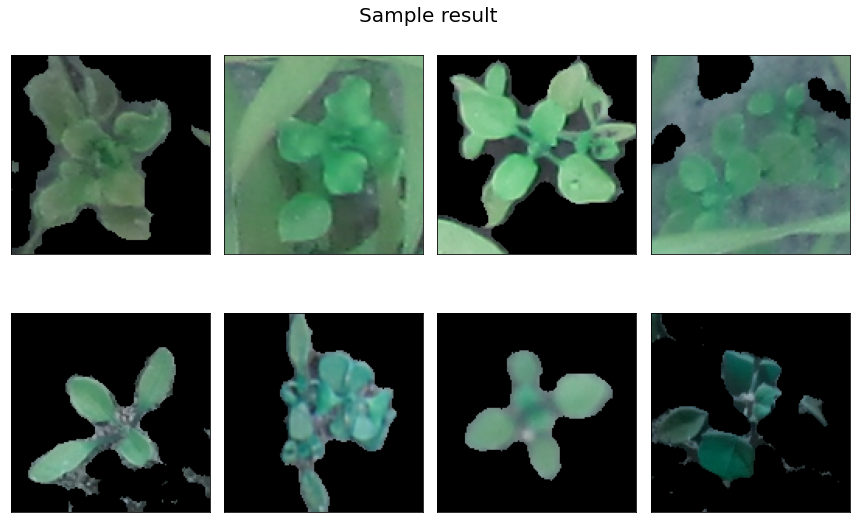

In [ ]:
# Visulaising the sample result
clearTrainImg = np.asarray(clearTrainImg)
plt.figure(figsize=(12,8))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(clearTrainImg[i])
    plt.xticks([]), plt.yticks([])
    
plt.suptitle("Sample result", fontsize=20)  
plt.tight_layout()
plt.show()